<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/NLP/NLP_%EC%9D%B4%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## corpus
- 말뭉치
- 가지고 있는 텍스트 데이터
- ex) 3개의 문장

## Word Embedding
- dense하게 차원축소
- 엄청난 양의 corpus로 학습되어 각 단어에 대한 정보를 꽤나 정확하고 깊게 담아냄
1. GloVe
2. word2vec


## GloVe
- co-occurrence matrix
- 한 단어와 근처 단어가 몇 번 "같이" 나오는지 세보는 것
- 차원축소 알고리즘 중 하나인 SVD를 사용하여 300 X 40,000 의 행열로 압축

## word2vec
- skipgram 성능이 좋음
- 예측을 위한 분류모델 : neural network로 구현되고 SGD로 학습
- vector의 방향성에 encoding 됨
1. skipgram : 타깃단어를 이용하여 주변단어들을 예측
2. CBOW : 주변단어들을 이용하여 타깃단어를 예측

# 기본개념
- 세상에 존재하는 어떤 미지의 확률분포함수를 모사(approximate)
- 주어진 입력(x)에 대해서 원하는 출력(y)을 반환하도록, 손실함수를 최소화하는 파라미터를 찾는 것
      1. Gradient descent를 수행하기 위해 back-propagation을 수행
      2. MLE(Maximum Likelihood Estimation)
- Autoencoders(인코더와 디코더를 통해 압축과 해제를 실행)가 Non-linear dimension reduction을 수행 : 데이터를 효과적으로 압축
      [Autoencoders]
      1. 손실압축(쓸데없는 정보는 버리고 중요한 정보들을 보존) 수행
      2. 특징(feature)을 추출하는 방법을 자동으로 학습
- 낮은 차원으로의 표현을 통해 차원의 저주를 벗어나 효과적인 학습이 가능  
      **데이터 학습을 위해 차원이 증가하면서 학습데이터 수가 차원의 수보다 적어져 성능이 저하되는 현상
      


## Text Classification
1. RNN
2. CNN

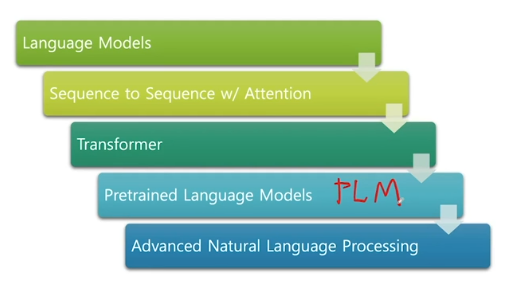

## LM (Language Model)


- 문장 자체의 출현 확률을 예측하거나, 이전 단어들이 주어졌을 때 다음 단어를 예측하기 위한 모델
- 단어와 단어 사이의 출현빈도를 세어 확률을 계산 -> 실제 사람이 가진 언어모델(Ground-truth 확률분포)에 근사하게 모델링하는 것
- Markov assumption(앞에 k개만 보기) 도입 : 보통 tri-gram(k=2)을 가장 많이 사용
- Markov assumption을 통해서도 여전히 확률 값이 0이 될 수 있으므로 Smoothing, Discounting, Interpolation, or Back-off를 통해 현상을 완화
- Interpolation : 람다x(general LM) + (1-람다)x(domain specific LM)
- Back-off : Markov assumption처럼 n을 점점 줄여나감, 람다1x(k개) + 람다2x(k-1개) + ... + 람다kx(0개)
- 그러나 단어를 discrete symbol로 보기 때문에 문제가 발생(사람처럼 핑크색을 빨간색으로 유사하게 보지 않음) -> 딥러닝(임베딩을 통해 유사도를 구할 수 있음)이 해결해줌!

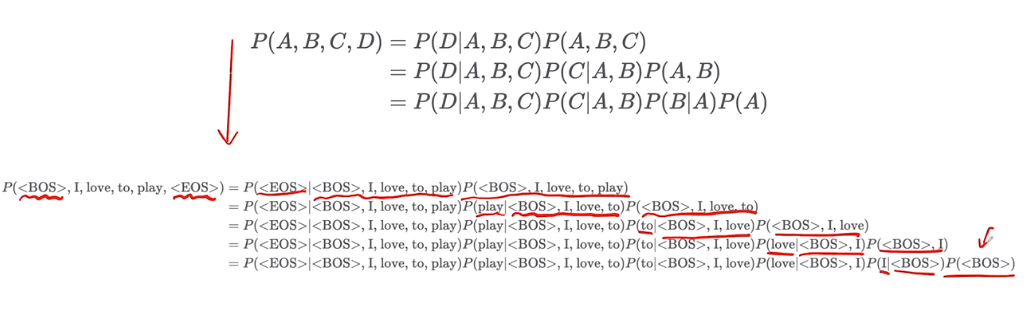

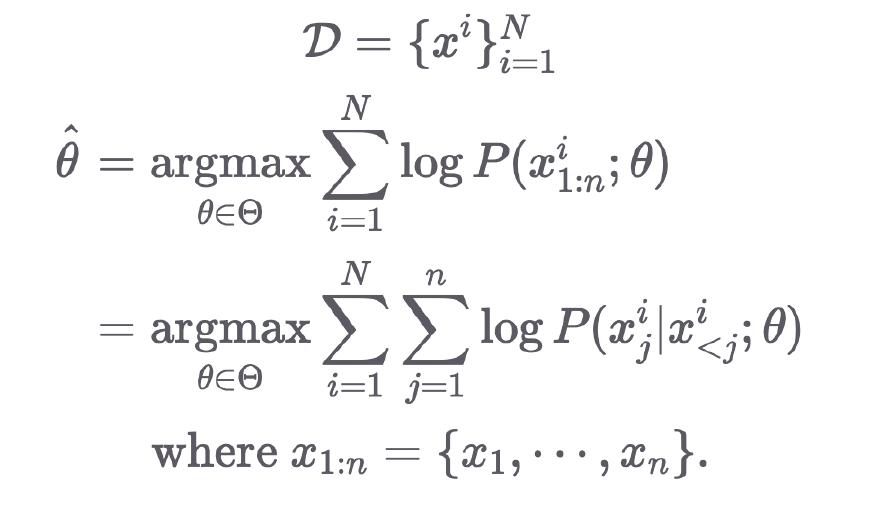

- 흔히 나올 수 없는 문장(낮은 확률)일수록 더 높은 정보량을 가짐
- Entropy가 낮을수록 sharp한 분포
- minimize cross entropy = minimize perplexity(헷갈리는 문장을 적게) = minimize negative log-likelihood = GT분포와 LM분포 사이의 cross entropy를 구하고 minimize
      * perplexity(PPL) : 확률을 역수취한 값을 기하평균, PPL이 높을수록 확률분포가 Flat함(bad)

In [ ]:
wc -l ./*.txt # 라인수
wc ./*.txt # 라인수, 단어수, character수
head ./1_구어체\(1\).txt
cat ./*txt > corpus.tsv
head -n 5 ./corpus.tsv

shuf ./corpus.tsv > ./corpus.shuf.tsv
wc -l ./corpus.*
head -n 5 ./corpus.shuf.tsv

head -n 1200000 ./corpus.shuf.tsv > ./corpus.shuf.train.tsv ; tail -n 402418 ./corpus.shuf.tsv | head -n 200009 > ./corpus.shuf.valid.tsv
tail -n 202409 ./corpus.shuf.tsv > ./corpus.shuf.test.tsv 
wc -l ./corpus.shuf.*
head ./corpus.shuf.train.tsv

cut -f1 ./corpus.shuf.train.tsv > ./corpus.shuf.train.ko ; cut -f2 ./corpus.shuf.train.tsv > ./corpus.shuf.train.en
head -n 3 ./corpus.shuf.train.*
cut -f1 ./corpus.shuf.valid.tsv > ./corpus.shuf.valid.ko ; cut -f2 ./corpus.shuf.valid.tsv > ./corpus.shuf.valid.en
cut -f1 ./corpus.shuf.test.tsv > ./corpus.shuf.test.ko ; cut -f2 ./corpus.shuf.test.tsv > ./corpus.shuf.test.en
head -n 3 ./corpus.shuf.*.ko

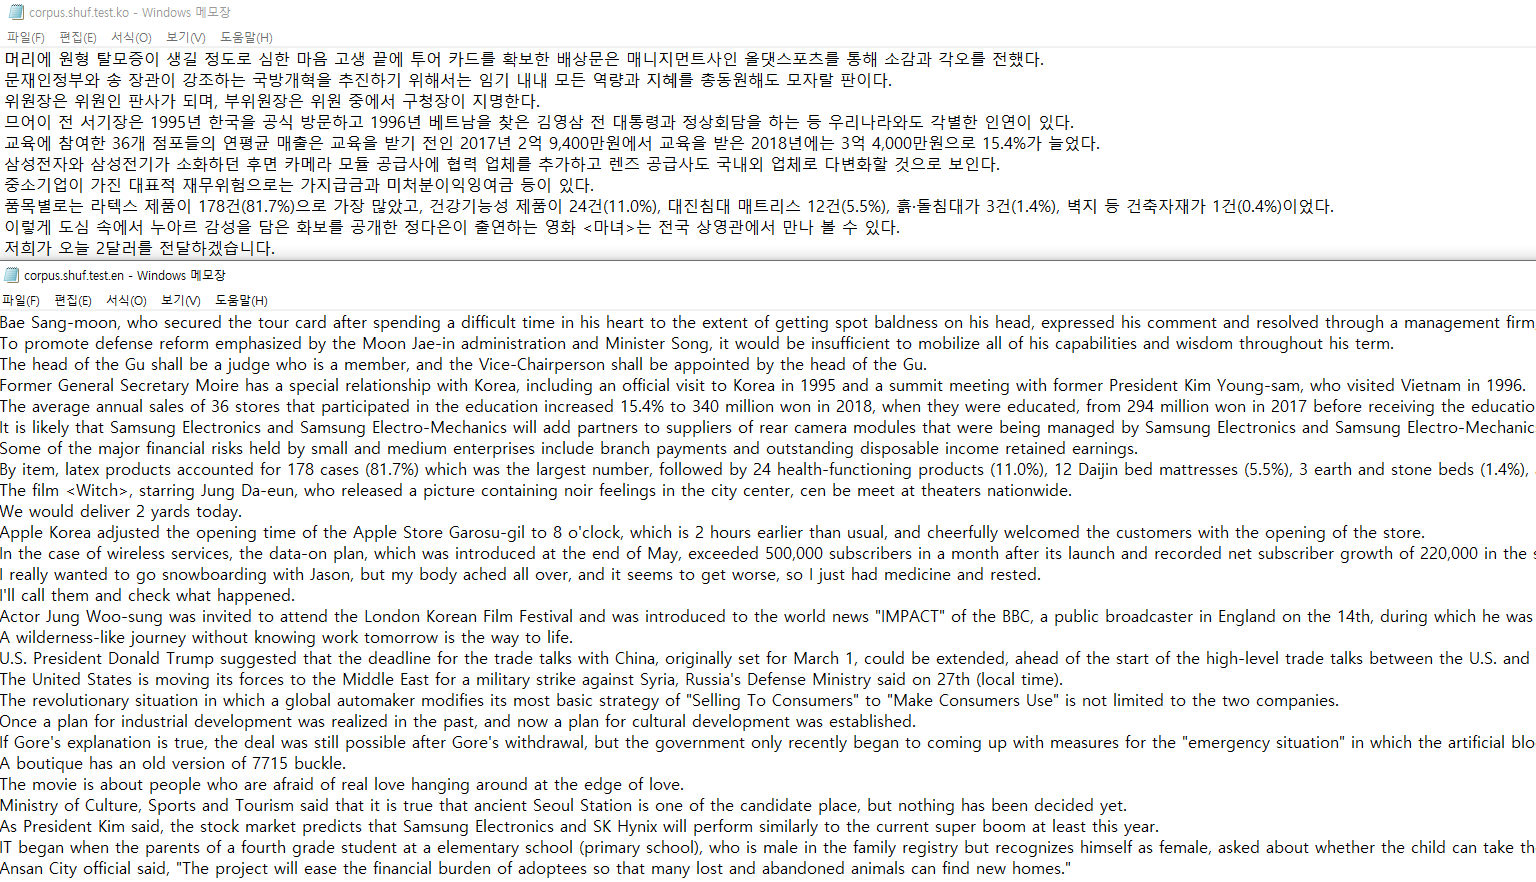

## Subword Segmentation
- BPE(Byte pair encoding)를 통해 OoV를 없앨 수 있음(매우 큰 이점)
- Tokenization(형태소 분석기)을 진행한 이후, subword segmentation을 적용하는 것이 좋음

## Sequence-to-Sequence with Attention
- text to numeric을 넘어서 numeric to text를 가능하게 함
- 단어를 discrete가 아닌 continuous한 값으로 변환하여 계산하여 Better generalization
- 2014년에 Sequence-to-Sequence가 발명이되면서 NLP 특히 기계번역(MT)에서 꽃피움
- Encoder + Decoder + Generator
- 활용
      1. MT
      2. 요약
      3. 음성인식
      4. Lip Reading
      5. 이미지 설명
      6. 챗봇

### Attention
- LSTM을 쓰더라도 context vector에 모든 정보를 담기에는 한계가 있음
- Attention을 통해 RNN의 hidden state의 한계를 극복
- 미분 가능한 "Key"-"Value" function
- 정보를 잘 얻기 위한 "Query"를 변환하는 방법을 배우는 과정
- Masking : softmax 결과 < pad >에는 0이 할당됨
- Input Feeding : 디코더 input에 "임베딩한 y값"과 "이전 레이어에서 softmax 들어가기 전 틸다h"를 더한 값을 넣어주기, Teacher Forcing으로 인한 학습과 추론 사이의 괴리를 최소화

### Auto-regressive : NLG에서 중요
- 과거 자신의 상태를 참조하여 현재 자신의 상태를 업데이트
- 초반에 잘못 추론하면 갈수록 즉 문장길이가 길어질수록 성능이 떨어짐
- 따라서 Teacher Forcing(input에 추론값이 아닌 원래 정답값을 넣어줌)이라는 학습방법을 써야 함
- 그러나 학습(정답)과 추론 사이의 괴리가 생김
- 따라서 Input Feeding으로 해소를 해줌


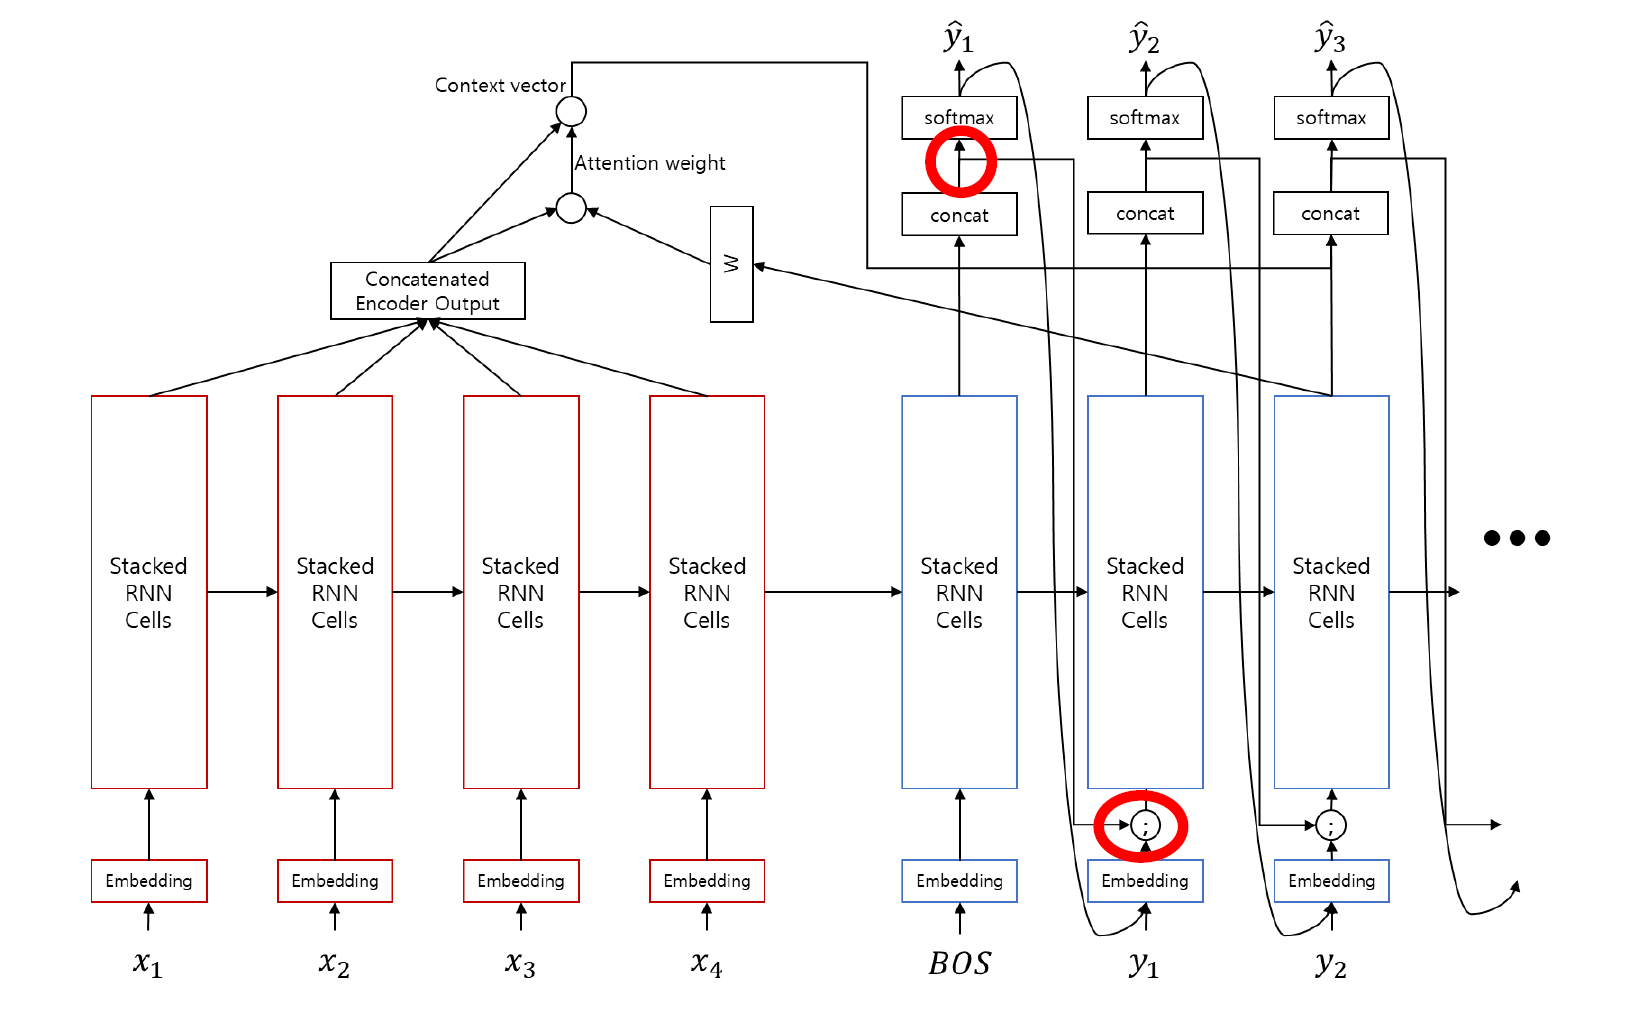